# TUGAS 2 KLASIFIKASI BAHASA ISYARAT

### Memanggil Import yang digunakan

In [100]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import splitfolders as sp


### memuat lokasi dataset

In [101]:
path = 'dataset/raw/'
datasplit  = 'dataset/data' 

### membuat dataset untuk train,val,test untuk klasifikasinya

In [102]:
sp.ratio(path, output="dataset/data", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 329 files [00:01, 222.20 files/s]


### membuat nama kelasnya

In [103]:
import os
kategori = os.listdir(path)
kategori

['A', 'B', 'C']

### melakukan ImageDataGenerator

In [104]:
train_datagen = ImageDataGenerator(
    os.path.join(datasplit,"train"),
    rescale = 1/255.0,

    shear_range = 0.1,
    width_shift_range = 0.3,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    vertical_flip = True,
    validation_split = 0.2
)
val_datagen = ImageDataGenerator(
    os.path.join(datasplit,"val"),
    rescale = 1/255.0,
    validation_split = 0.2
)
test_datagen = ImageDataGenerator(
    os.path.join(datasplit,"test"),
    rescale = 1/255.0,
    validation_split = 0.2
)

### membuat datagenerator

In [105]:
test_dataset = test_datagen.flow_from_directory(
    os.path.join(datasplit,"test"),
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary'
)


Found 25 images belonging to 3 classes.


In [106]:
train_dataset = train_datagen.flow_from_directory(
    os.path.join(datasplit,"train"),
    target_size = (150, 150),
    batch_size = 16,
    class_mode = 'categorical',
    subset = 'training'
)

Found 146 images belonging to 3 classes.


In [107]:
validation_dataset = val_datagen.flow_from_directory(
    os.path.join(datasplit,"val"),
    target_size = (150, 150),
    batch_size = 166,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 4 images belonging to 3 classes.


### membuat layer

In [108]:


model = tf.keras.Sequential([
tf.keras.layers.Conv2D(256, (3,3), activation='relu',
input_shape=[150,150,3]),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(3, activation='softmax')
])


### memlakukan compile model dan melatih model

In [109]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [110]:
history = model.fit(
    train_dataset,
    epochs=15,
    validation_data=validation_dataset,
)


Epoch 1/15
10/10 [==============================] - 19s 2s/step - loss: 1.2416 - accuracy: 0.5890 - val_loss: 0.8145 - val_accuracy: 0.5000
Epoch 2/15
10/10 [==============================] - 17s 2s/step - loss: 0.8236 - accuracy: 0.5068 - val_loss: 0.8046 - val_accuracy: 0.5000
Epoch 3/15
10/10 [==============================] - 18s 2s/step - loss: 0.7365 - accuracy: 0.4726 - val_loss: 0.6978 - val_accuracy: 0.5000
Epoch 4/15
10/10 [==============================] - 19s 2s/step - loss: 0.6951 - accuracy: 0.4863 - val_loss: 0.7050 - val_accuracy: 0.5000
Epoch 5/15
10/10 [==============================] - 19s 2s/step - loss: 0.6812 - accuracy: 0.5890 - val_loss: 0.6747 - val_accuracy: 0.5000
Epoch 6/15
10/10 [==============================] - 19s 2s/step - loss: 0.6685 - accuracy: 0.6233 - val_loss: 0.5852 - val_accuracy: 0.7500
Epoch 7/15
10/10 [==============================] - 20s 2s/step - loss: 0.5684 - accuracy: 0.6644 - val_loss: 0.3278 - val_accuracy: 1.0000
Epoch 8/15
10/10 [==

### menampilkan grafik akurasi

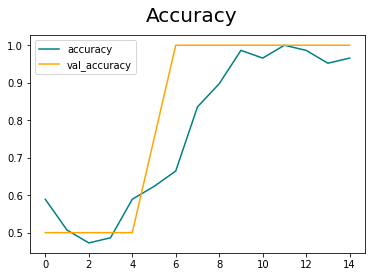

In [111]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### menampilkan hasil prediksi

In [112]:
predictions = model.predict(test_dataset)

2/2 [==============================] - 2s 756ms/step


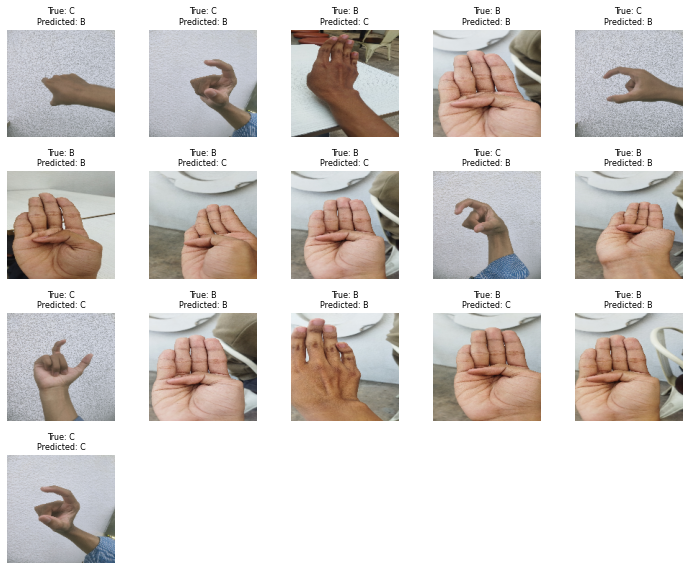

In [113]:
def show_prediction_result(images, labels, predictions):
    plt.figure(figsize=(10, 10))
    for i in range(len(labels)):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f'True: {kategori[int(labels[i])]}\nPredicted: {kategori[int(np.argmax(predictions[i]))]}', fontsize=8)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Fetch a larger batch of images and labels
images, labels = next(iter(test_dataset))

# Call the show_prediction_result() function
show_prediction_result(images, labels, predictions)